## Date: 01/02/2023

Sklearn doc: https://scikit-learn.org/stable/modules/classes.html

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import mlxtend
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix

In [2]:
print("numpy version: ", np.__version__)
print("sklearn version: ", sklearn.__version__)
print("matplotlib version: ", matplotlib.__version__)
print("seaborn version: ", sns.__version__)
print("pandas version: ", pd.__version__)
print("mlexten version: ", mlxtend.__version__)

# numpy version:  1.24.1
# sklearn version:  1.2.0
# matplotlib version:  3.6.3
# seaborn version:  0.12.2
# pandas version:  1.5.2
# mlexten version:  0.21.0

numpy version:  1.24.1
sklearn version:  1.2.0
matplotlib version:  3.6.3
seaborn version:  0.12.2
pandas version:  1.5.2
mlexten version:  0.21.0


In [3]:
# Load dataset

df = sns.load_dataset("iris")

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.shape

(150, 5)

doc: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder

In [5]:
# Apply encoding for target variable

l_encoding = LabelEncoder()

In [6]:
df['species'] = l_encoding.fit_transform(X=df['species'])

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
l_encoding.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [9]:
df2 = df[['sepal_length', 'petal_length', 'species']]

df2.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [10]:
# split the dataset into X and y

X = df2.iloc[:, :-1]
y = df2.iloc[:, -1]

In [11]:
X

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


In [12]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [14]:
X_train.shape

(120, 2)

In [15]:
X_test.shape

(30, 2)

In [16]:
# Let's create our model

lr_model = LogisticRegression()

In [17]:
lr_model.fit(X=X_train, y=y_train)

LogisticRegression()

In [18]:
y_pred = lr_model.predict(X=X_test)

In [19]:
print(accuracy_score(y_true=y_test, y_pred=y_pred))

0.9333333333333333


### Plot confusion matrix

Doc of confusion matrix: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix

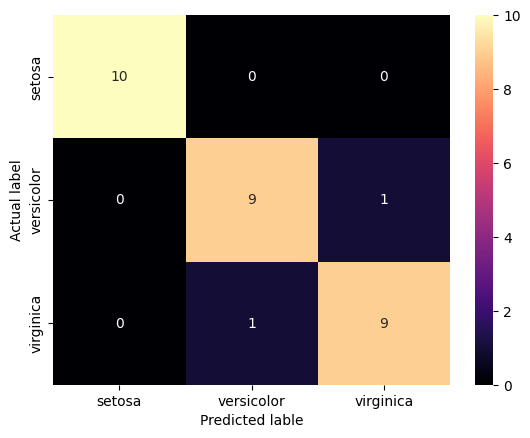

In [20]:
# Let's plot confusion matrix

# this is our own way

matrix = pd.DataFrame(data=confusion_matrix(y_true=y_test, y_pred=y_pred))
sns.heatmap(data=matrix, annot=True, cmap=plt.cm.magma, xticklabels=l_encoding.classes_, yticklabels=l_encoding.classes_)
plt.xlabel(xlabel="Predicted lable")
plt.ylabel(ylabel="Actual label")
plt.show()

Doc: 
doc: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay

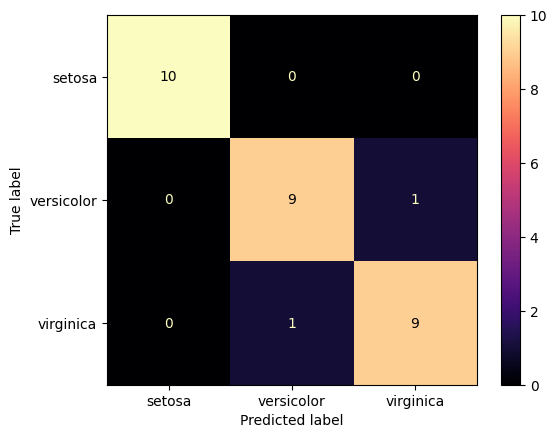

In [21]:
# Another way to plot confusion matrix by sklearn class

ConfusionMatrixDisplay.from_estimator(estimator=lr_model, X=X_test, y=y_test, 
                                      cmap=plt.cm.magma, display_labels=l_encoding.classes_)
plt.show()

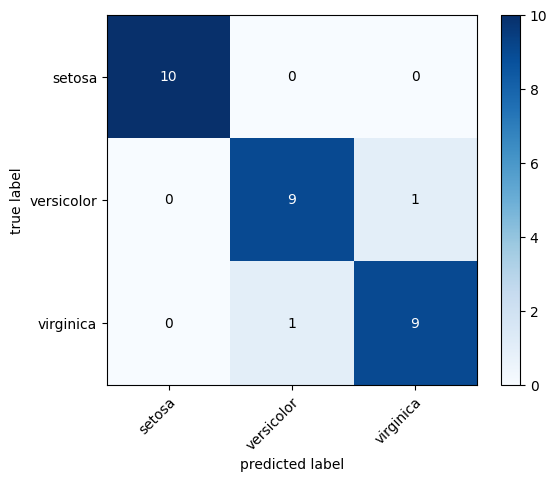

In [22]:
# Ploting confusion matrix using mlextend

c_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plot_confusion_matrix(conf_mat=c_matrix, colorbar=True, class_names=l_encoding.classes_)

plt.show()

In [23]:
# prediction

query = np.array([[3.4,2.7]])

lr_model.predict_proba(X=query)

C:\Users\alami\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[8.35844240e-01, 1.63854613e-01, 3.01147276e-04]])

In [24]:
lr_model.predict(X=query)

C:\Users\alami\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

Doc of mlextend: http://rasbt.github.io/mlxtend/

Doc: http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/

Doc: http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.plotting/#plot_decision_regions

C:\Users\alami\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


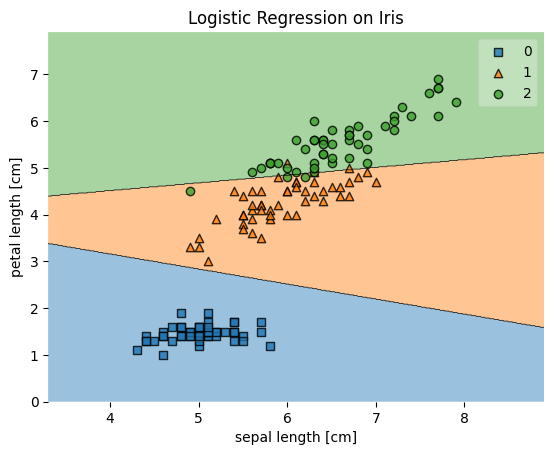

In [25]:
# Decision regions in 2D

# Plotting decision regions
plot_decision_regions(X=X.values, y=y.values, clf=lr_model)
plt.title(label="Logistic Regression on Iris")
plt.xlabel(xlabel="sepal length [cm]")
plt.ylabel(ylabel="petal length [cm]")
plt.show()

C:\Users\alami\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


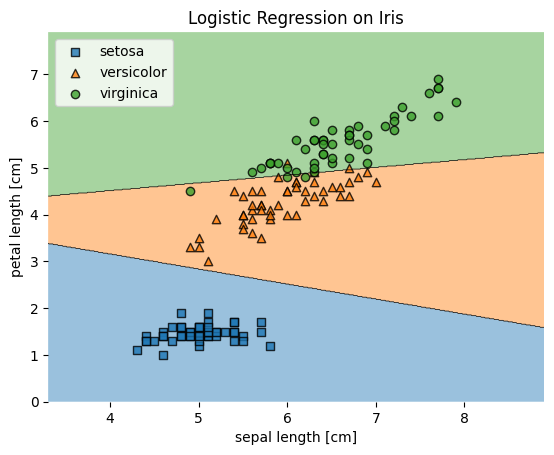

In [26]:
# customize

# Plotting decision regions
ax = plot_decision_regions(X=X.values, y=y.values, clf=lr_model, legend=0)

handles, labels = ax.get_legend_handles_labels()

ax.legend(handles, l_encoding.classes_)

plt.title(label="Logistic Regression on Iris")
plt.xlabel(xlabel="sepal length [cm]")
plt.ylabel(ylabel="petal length [cm]")
plt.show()